In [70]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
import seaborn as sn # para visualização dos resultados

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.cluster import DBSCAN

In [71]:
# Importando os dados 
consumo_produtos = pd.read_csv("ConsumoProdutos.csv")

# Exibindo as primeiras linhas do dado
consumo_produtos

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [72]:
consumo_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [73]:
consumo_produtos.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [74]:
# avaliando nulos

dt_total = consumo_produtos.isnull().sum().sort_values(ascending=False)
perc_1 = consumo_produtos.isnull().sum()/consumo_produtos.isnull().count()*100
perc_2 = (round(perc_1, 1)).sort_values(ascending=False)
dados_fatantes = pd.concat([dt_total, perc_2], axis=1, keys=['Total', '%'])
dados_fatantes.head(20)

,Total,%
Delicassen,0,0.0
Detergents_Paper,0,0.0
Frozen,0,0.0
Grocery,0,0.0
Milk,0,0.0
Fresh,0,0.0
Region,0,0.0
Channel,0,0.0


In [75]:
consumo_produtos.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [76]:
# Utilizando scaler para melhorar a métrica de dados mais próximos

padronizando = StandardScaler()
consumo_produtos = padronizando.fit_transform(consumo_produtos).round(3)

C:\Users\Volnei Fuzer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Volnei Fuzer\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
# retornando para um dataframe

consumo_produtos = pd.DataFrame(consumo_produtos)
consumo_produtos.columns = ['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [78]:
consumo_produtos.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.449,0.591,0.053,0.524,-0.041,-0.589,-0.044,-0.066
1,1.449,0.591,-0.391,0.544,0.170,-0.270,0.086,0.089
2,1.449,0.591,-0.447,0.409,-0.028,-0.138,0.133,2.243
3,-0.690,0.591,0.100,-0.624,-0.393,0.687,-0.499,0.093
4,1.449,0.591,0.840,-0.052,-0.079,0.174,-0.232,1.299


In [79]:
consumo_produtos_filtro = consumo_produtos[['Fresh', 'Frozen']]

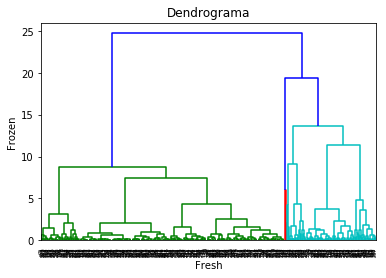

In [80]:
dendrograma = sch.dendrogram(sch.linkage(consumo_produtos_filtro, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

In [81]:
modelo_hierarquico = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

In [82]:
modelo_hierarquico.fit_predict(consumo_produtos_filtro)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [83]:
print(modelo_hierarquico.labels_)

[1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 2 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1]


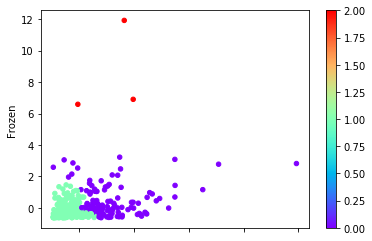

In [84]:
consumo_produtos_filtro.plot.scatter(x='Fresh', y='Frozen', c=modelo_hierarquico.labels_, cmap='rainbow')

In [85]:
modelo_hierarquico_dois = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')

In [86]:
modelo_hierarquico_dois.fit_predict(consumo_produtos_filtro)

predicao_dois = modelo_hierarquico_dois.fit_predict(consumo_produtos_filtro)

In [87]:
predicao_dois

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 3, 1, 0, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1,
       3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 1, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 1, 1, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 1,
       3, 0, 3, 1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,

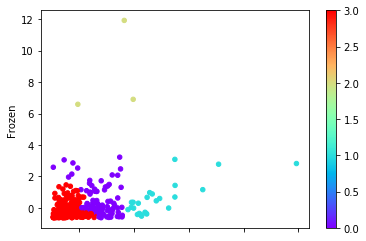

In [88]:
consumo_produtos_filtro.plot.scatter(x='Fresh', y='Frozen', c=modelo_hierarquico_dois.labels_, cmap='rainbow')

In [89]:
# Kmins

In [90]:
consumo_produtos_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
Fresh     440 non-null float64
Frozen    440 non-null float64
dtypes: float64(2)
memory usage: 7.0 KB


In [91]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(X = data)
        wcss.append(kmeans.inertia_)

    return wcss

Text(0, 0.5, 'WCSS')

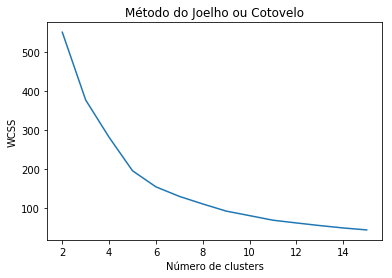

In [92]:
# Soma dos quadrados intra-cluster - WCSS (within- clusters sum-of-squares) 
plt.plot(range(2, 16), calculate_wcss(consumo_produtos_filtro))
plt.title('Método do Joelho ou Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [93]:
soma_dos_quadrados = calculate_wcss(consumo_produtos_filtro)

soma_dos_quadrados

[549.6975461815478,
 376.62788004634604,
 281.602107677574,
 196.095992424051,
 154.81019467422715,
 130.7461277217544,
 111.36490460034082,
 93.19625626700747,
 81.7393350780978,
 72.85939220622745,
 63.05983325989903,
 55.9096232444347,
 50.11027663775225,
 44.86879477246781]

In [94]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [95]:
numero_de_grupos = optimal_number_of_clusters(soma_dos_quadrados)

numero_de_grupos

6

In [96]:
kmeans = KMeans(n_clusters = numero_de_grupos)

grupos = kmeans.fit_predict(consumo_produtos_filtro)

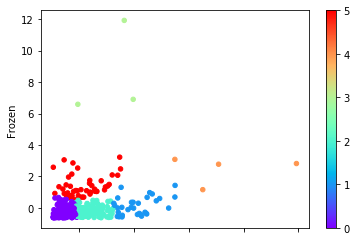

In [97]:
consumo_produtos_filtro.plot.scatter(x='Fresh', y='Frozen', c=kmeans.labels_, cmap='rainbow')

In [98]:
# Usando DBScan

In [102]:
consumo_produtos_clustereing = DBSCAN(eps=3, min_samples=2).fit(consumo_produtos_filtro)
consumo_produtos_clustereing.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [105]:
consumo_produtos_clustereing

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)